In [1]:
from obspy.clients.fdsn import Client
from obspy import UTCDateTime

In [6]:
client = Client("IRIS")
t = UTCDateTime("2018-01-01T00:00:00.000")
st = client.get_waveforms("GS", "OK029", "*", "HH1", t, t+24*60*60)

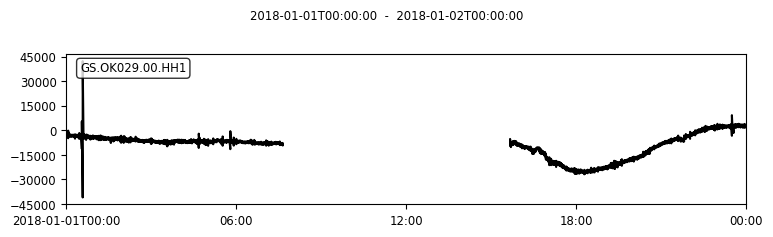

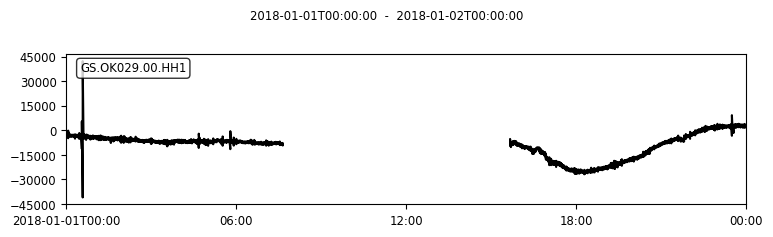

In [15]:
st.plot()

In [16]:
len(st)

2

In [20]:
for i, trace in enumerate(st):
    trace.write(f"data/2018_01_01_{i}.slist", format="SLIST")

### Load again

In [18]:
import pandas as pd
a = pd.datetime(2018, 1, 1, )
b = pd.datetime(2018, 1, 2)
(b - a).total_seconds() == 24*3600

True

In [11]:
type(np.concatenate((np.array([]), [np.nan] * 10)))

NameError: name 'np' is not defined

In [12]:
first = !ls *_1.slist
first = first[0]
a=!ls 2018_01_01_*
print(a, first)

['2018_01_01_0.slist', '2018_01_01_1.slist'] 2018_01_01_1.slist


In [27]:
import os
import pandas as pd
import numpy as np
START_TIME_INDEX = 3
sps = 100

def gaussian_interpolation(v1, v2, nb_missing_values, mean=0, std=300, sample_freq=sps):
    x = [0, nb_missing_values]
    f_x = [v1, v2]
    missing_times = np.linspace(0, nb_missing_values - 1, nb_missing_values)
    interp_v = np.interp(missing_times, x, f_x)
    noise = np.random.normal(mean, std, nb_missing_values)
    return interp_v + noise


dir_data = './downloads'

X = np.array([])
all_dirs = !ls $dir_data
for d in all_dirs:
    temp = dir_data+'/'+d
    print(temp)
    first_trace = !ls $temp/0.slist
    first_trace = first_trace[0]
    print(first_trace)
    header = pd.read_csv(first_trace, sep='\t', nrows=0).columns[0].split(', ')
    first_start_time = pd.to_datetime(header[START_TIME_INDEX])
    print("First -> ", first_start_time)

    
    all_slists = !ls $temp
    for slist in all_slist:
        x_len_b = X.shape[0]

        # Compute size of padding
        slist_full_path = os.path.join(dir_data, slist)
        header = pd.read_csv(slist_full_path, sep='\t', nrows=0).columns[0].split(', ')
        start_time = pd.to_datetime(header[START_TIME_INDEX])
        time_elapsed = start_time - first_start_time
        num_elem_elapsed = int(time_elapsed.total_seconds()) * sps
        num_elem_padd = num_elem_elapsed - X.shape[0]
        print(time_elapsed)

        # Extract data in current file
        new_X = pd.read_csv(slist_full_path, sep='\t', header=0, names=["1", "2", "3", "4", "5", "6"])
        new_X = new_X.to_numpy().reshape(-1)
        new_X = new_X[~(np.isnan(new_X))]

        # Add interpolated padding and new data
        mean_prev = np.mean(X[-100:])
        mean_curr = np.mean(new_X[:100])
        gaussian_padding = gaussian_interpolation(mean_prev, mean_curr, num_elem_padd)
        X = np.concatenate((X,gaussian_padding))
        X = np.concatenate((X, new_X))
        print(x_len_b, num_elem_padd, new_X.shape[0], X.shape[0])


./downloads/1
./downloads/1/0.slist
First ->  2018-01-01 00:00:00


FileNotFoundError: [Errno 2] File b'./downloads/2018_01_01_0.slist' does not exist: b'./downloads/2018_01_01_0.slist'